## Reto 1: Peticiones a una API usando requests

### 1. Objetivos:
    - Usar la librería Requests para hacer una petición HTTP a una API
 
---
    
### 2. Desarrollo:

### a) Petición HTTP a API de NASA

Vamos a implementar un programa que realice una llamada HTTP a la API de NASA.

Puedes leer la documentación de la API [aquí](https://api.nasa.gov/), bajo el título de "Asteroids NeoWs".

In [39]:
## Realiza aquí los imports necesarios

Tu reto consiste en los siguientes pasos:

1. Crea una cuenta en el API de NASA para obtener tu propia API Key. Copia la API Key en la celda debajo para que no la pierdas:

In [40]:
api_key = 'X8essAgGDGbqFxKXTivWMjXeYoJNN4hfTmJmJl3c'

2. Asigna la variable `endpoint` -donde tendrás el URL base de la API de NASA- y la variable `payload` -donde tendrás el diccionario que usarás para pasar parámetros a tu petición.

3. Usa tu diccionario `payload` para agregar los parámetros necesarios para pedir la hoja número 100 de la API. Durante el ejemplo, pedimos simplemente la primera hoja. En esta ocasión, debes de descubrir que parámetros requieres pasarle para obtener la hoja #100. Además queremos que el número de resultados que nos regresen sea menor al default. El default es 20, pero tú tienes que mandar los parámetros adecuados para que te regresen solamente 5 resultados

In [41]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/neo/browse'
payload = {'api_key': api_key, 'page': 100, 'size': 5}

4. Realiza tu petición HTTP aquí debajo y checa tu código de respuesta para asegurarte de que la petición se haya hecho exitosamente:

In [42]:
import requests
import json
import pandas as pd

In [43]:
## Realiza aquí la llamada a la API
r = requests.get(endpoint, params=payload)

In [44]:
json_data = r.json()
keys = json_data.keys()

5. Si todo ha salido bien, extrae tus datos, normalízalos, crea un `DataFrame` con ellos y asígnalo a `objetos`. Revisa que solamente tengas 5 filas, para saber que tu petición se realizó exitosamente:

In [45]:
objetos = pd.json_normalize(json_data['near_earth_objects'])
df = pd.DataFrame(objetos)

6. Pídele a tu experta la función de verificación `visualizar_diametros` (encontrada en el archivo `helpers.py` de la carpeta donde se encuentra este Reto), pégala debajo y corre la celda para verificar tu resultado:

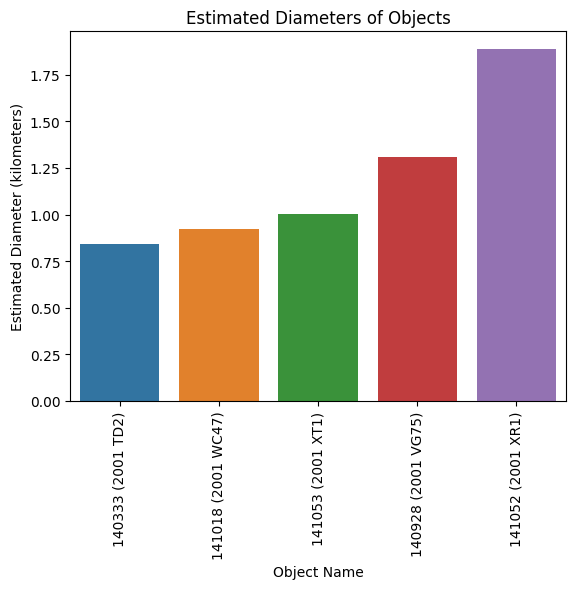

In [48]:
# Pega aquí la función de verificación
def visualizar_diametros(objetos):
    import seaborn as sns
    import matplotlib.pyplot as plt

    sizes = objetos[['name', 'estimated_diameter.kilometers.estimated_diameter_max']].copy()
    sizes.sort_values('estimated_diameter.kilometers.estimated_diameter_max', ascending=True, inplace=True)
    sns.barplot(x=sizes['name'], y=sizes['estimated_diameter.kilometers.estimated_diameter_max'])
    plt.xticks(rotation=90)
    plt.xlabel('Object Name')
    plt.ylabel('Estimated Diameter (kilometers)')
    plt.title('Estimated Diameters of Objects')
    plt.show()

visualizar_diametros(df)